## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

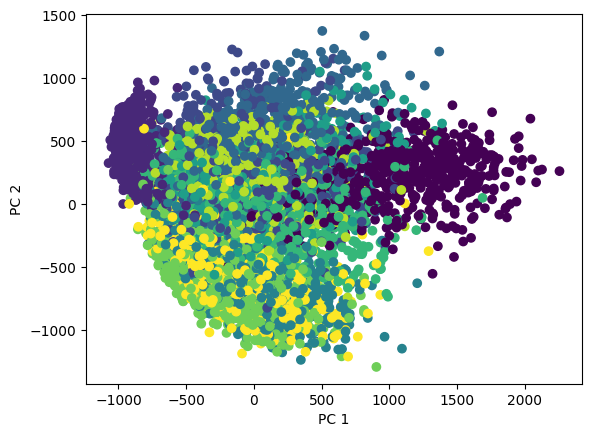

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_mnist_train)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_mnist_train, cmap='viridis')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

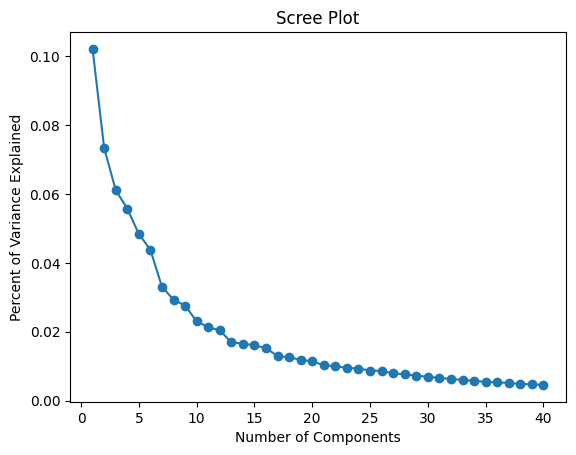

In [ ]:
pca = PCA(n_components=40)
pca.fit(X_mnist_train)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, 41), explained_variance_ratio, marker='o')
plt.title("Scree Plot")
plt.xlabel("No of Components")
plt.ylabel("Percent of Variance Explained")
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [5]:
pca = PCA(n_components=0.95)
pca.fit(X_mnist_train)
n_components = pca.n_components_
print(f"Number of components to explain 95% of variance: {n_components}")


Number of components to explain 95% of variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

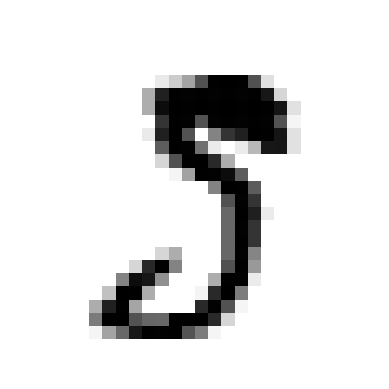

In [6]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

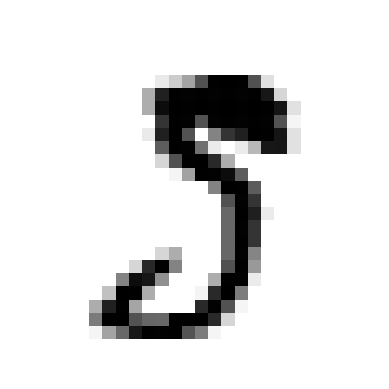

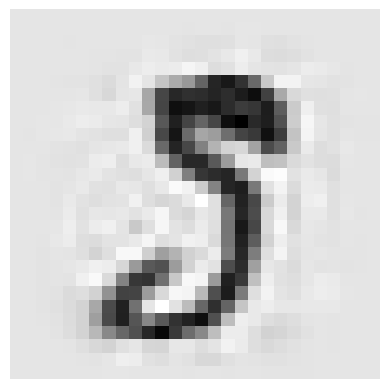

In [7]:
plot_mnist_digit(X_mnist_train[0])
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_mnist_train)
X_reconstructed = pca.inverse_transform(X_reduced)
plot_mnist_digit(X_reconstructed[0])


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [ ]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
print(f"Accuracy with original data: {accuracy_orig:.4f}")
pca_80 = PCA(n_components=0.80)
X_train_pca = pca_80.fit_transform(X_train_orig)
X_test_pca = pca_80.transform(X_test_orig)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA (80% variance): {accuracy_pca:.4f}")


Accuracy with original data: 0.9421
Accuracy with PCA (80% variance): 0.9529


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

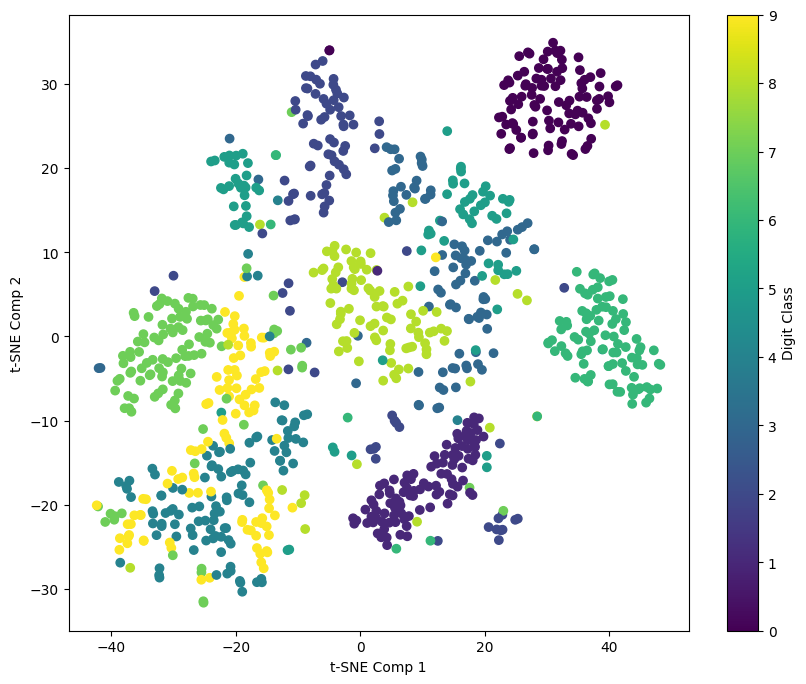

In [9]:
from sklearn.manifold import TSNE

X_tsne = X_mnist_train[:1000]
y_tsne = y_mnist_train[:1000]
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne_reduced = tsne.fit_transform(X_tsne)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c=y_tsne, cmap='viridis')
plt.xlabel("t-SNE Comp 1")
plt.ylabel("t-SNE Comp 2")
plt.colorbar(label='Digit Class')
plt.show()


2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [11]:
X_tsne_full = X[:2000]
y_tsne_full = y[:2000]

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne_full, y_tsne_full, test_size=0.2, random_state=42)

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')

X_train_tsne_reduced = tsne.fit_transform(X_train_tsne)
X_test_tsne_reduced = tsne.fit_transform(X_test_tsne) 
knn_tsne = KNeighborsClassifier()
knn_tsne.fit(X_train_tsne_reduced, y_train_tsne)
y_pred_tsne = knn_tsne.predict(X_test_tsne_reduced)
accuracy_tsne = accuracy_score(y_test_tsne, y_pred_tsne)
print(f"Accuracy with t-SNE reduced data: {accuracy_tsne:.4f}")


Accuracy with t-SNE reduced data: 0.0975


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


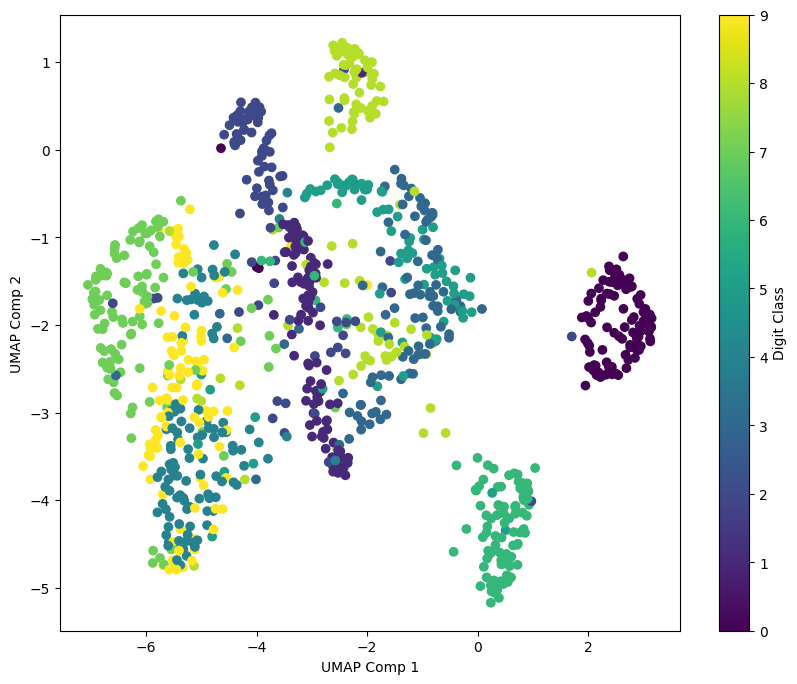

In [13]:
import umap

X_umap = X_mnist_train[:1000]
y_umap = y_mnist_train[:1000]

umap2d = umap.UMAP(n_components=2, random_state=42)
X_umap_reduced = umap2d.fit_transform(X_umap)

plt.figure(figsize=(10, 8))
plt.scatter(X_umap_reduced[:, 0], X_umap_reduced[:, 1], c=y_umap, cmap='viridis')
plt.xlabel("UMAP Comp 1")
plt.ylabel("UMAP Comp 2")
plt.colorbar(label='Digit Class')
plt.show()

In [ ]:
# Your code here


Now, calculate accuracy with KNN.

In [14]:
X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(X, y, test_size=0.2, random_state=42)

umap_full = umap.UMAP(n_components=2, random_state=42)

X_train_umap_reduced = umap_full.fit_transform(X_train_umap)
X_test_umap_reduced = umap_full.transform(X_test_umap)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_train_umap_reduced, y_train_umap)
y_pred_umap = knn_umap.predict(X_test_umap_reduced)

acc_umap = accuracy_score(y_test_umap, y_pred_umap)
print(f"Accuracy with UMAP reduced data: {acc_umap:.4f}")


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Accuracy with UMAP reduced data: 0.8707


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


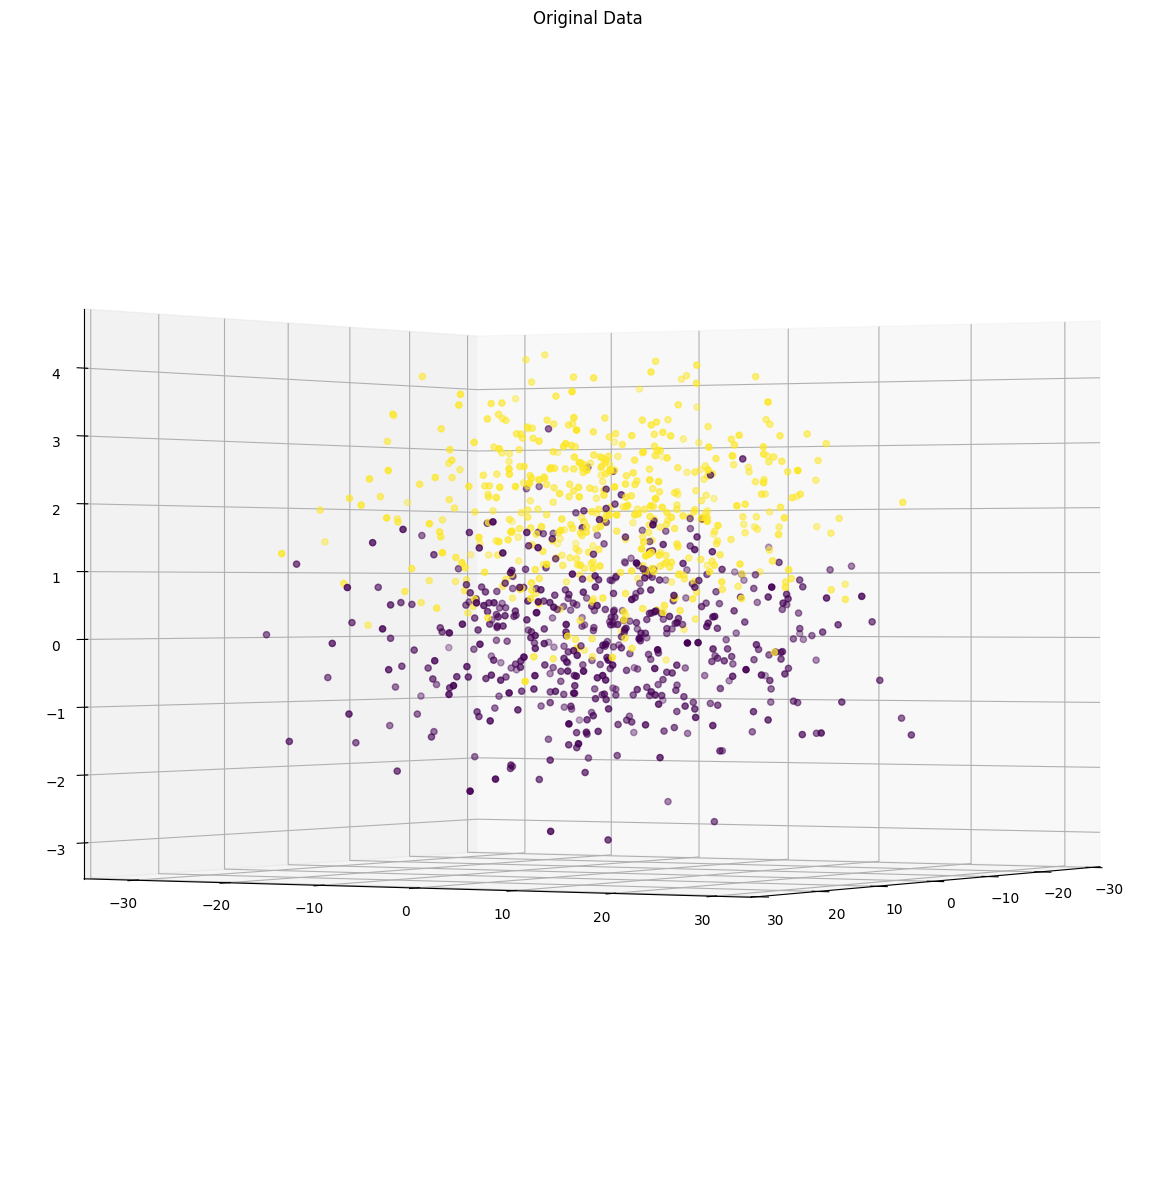

In [15]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [20]:

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

PCA-reduced Data Accuracy: 0.8440


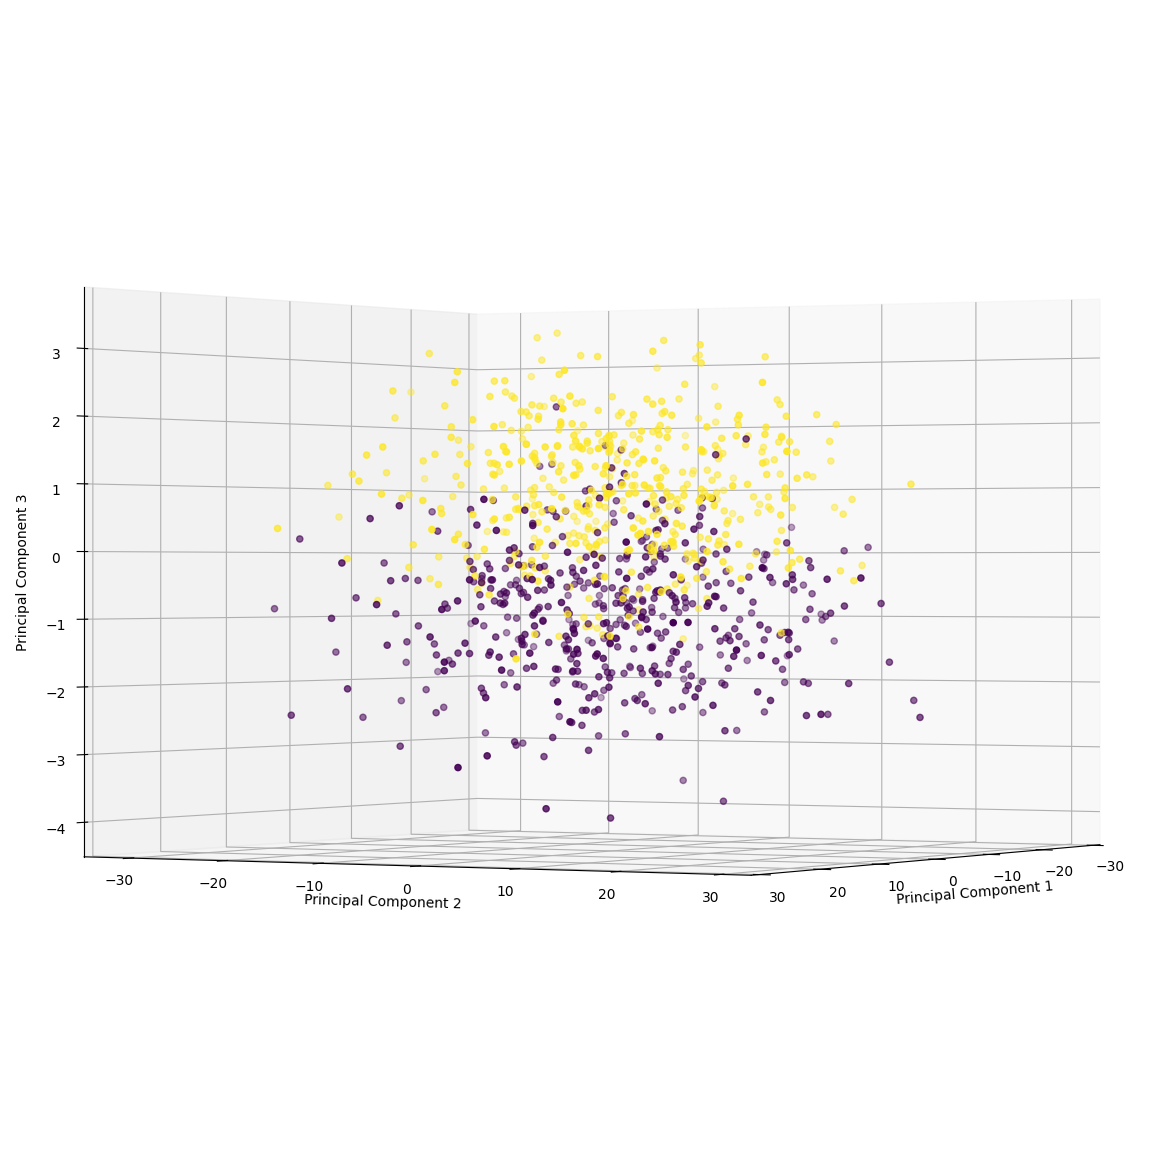

In [31]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

knn = KNeighborsClassifier()
knn.fit(X_reduced, y)
y_pred = knn.predict(X_reduced)
print(f"PCA-reduced Data Accuracy: {accuracy_score(y, y_pred):.4f}")

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


2. Try with UMAP.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP-reduced Data Accuracy: 0.8070


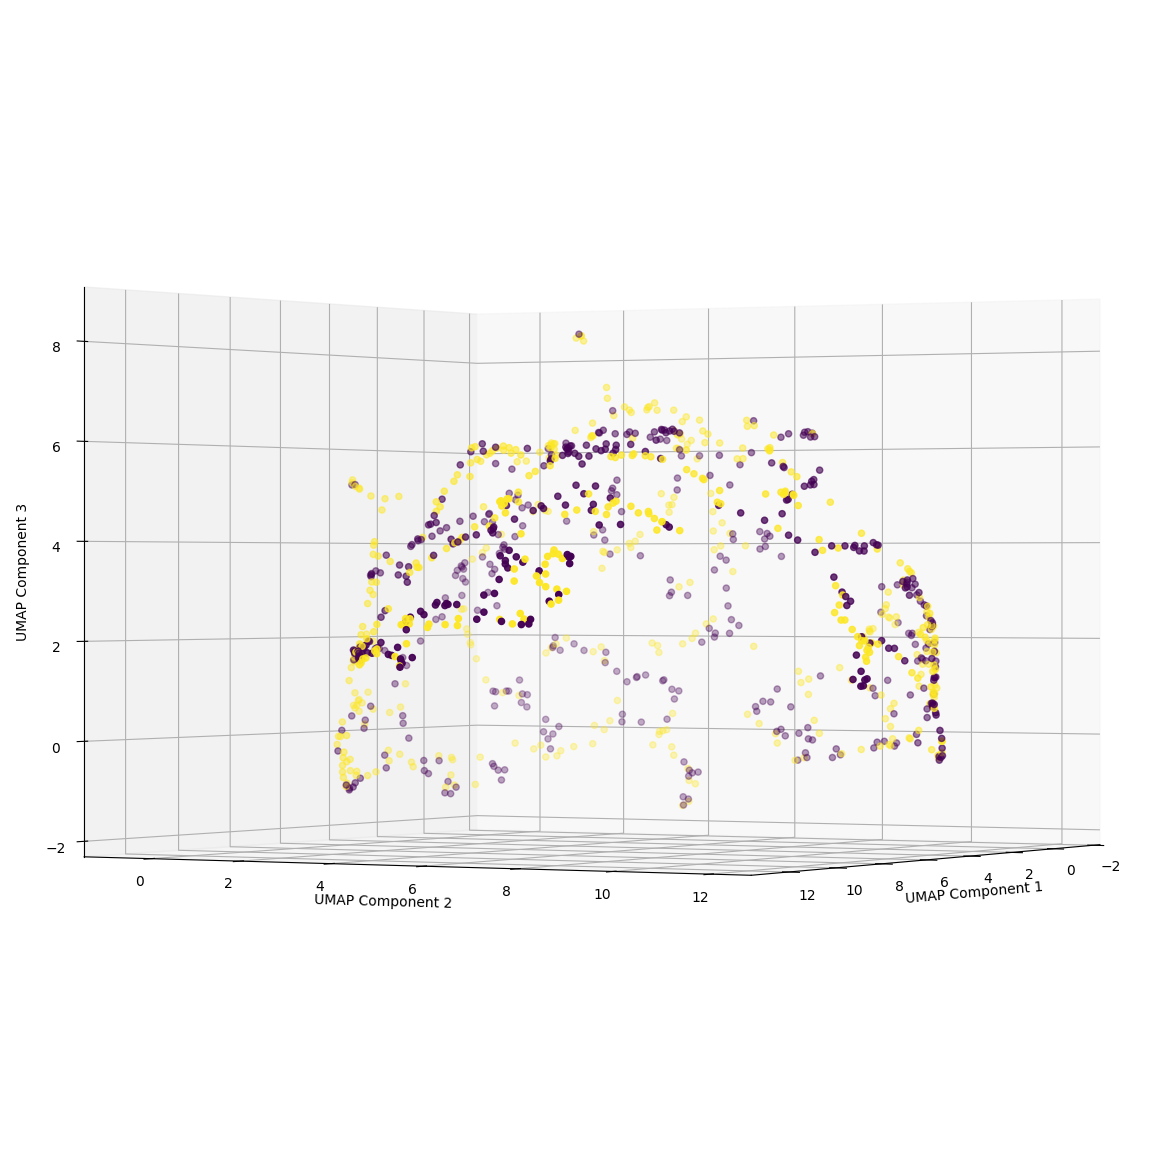

In [32]:


import umap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

umap_reducer = umap.UMAP(n_components=3, n_neighbors=5, min_dist=0.3, random_state=42)
X_reduced = umap_reducer.fit_transform(X)

knn = KNeighborsClassifier()
knn.fit(X_reduced, y)
y_pred = knn.predict(X_reduced)
print(f"UMAP-reduced Data Accuracy: {accuracy_score(y, y_pred):.4f}")

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)


ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='viridis')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')

plt.show()


Explain your results in the cell below.  Which works better?  Why?

*In this case, UMAP performs significantly better than PCA for the KNN classifier. The original data shows two classes of points that are separated along the Z-axis, with their X and Y values largely overlapping.*